<a href="https://www.kaggle.com/thirumani/shark-tank-india-analysis?scriptVersionId=88000580" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Shark Tank India (Season 1) Exploratory Data Analysis (EDA)

## Dataset https://www.kaggle.com/thirumani/shark-tank-india

In [1]:
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2022-Feb-16


### Importing Required Python Libraries

In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

### Check and import dataset

In [3]:
! ls -l /kaggle/input/shark-tank-india
shark_tank = pd.read_csv('/kaggle/input/shark-tank-india/Shark Tank India.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 20
-rw-r--r-- 1 nobody nogroup 18619 Feb 16 14:48 'Shark Tank India.csv'

There are 117 rows and 46 columns in the dataset


## Exploratory Data Analysis (EDA)

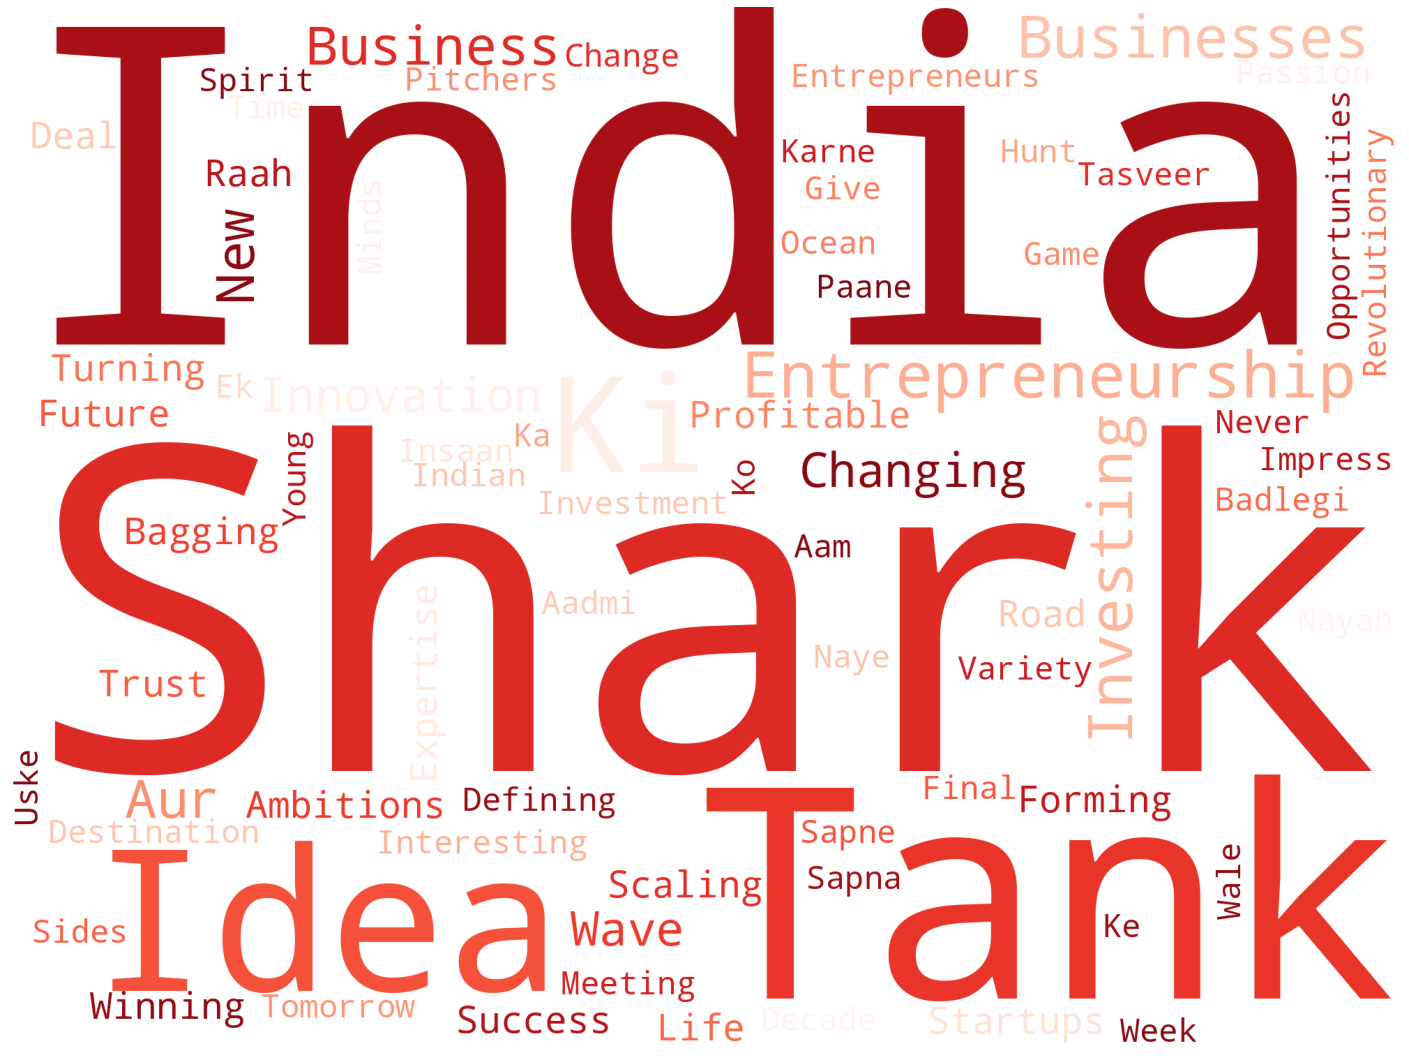

In [4]:
# Word cloud based on episode titles
text = " Shark Tank India ".join(cat for cat in shark_tank['Episode Title'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width = 2000, height = 1500, background_color='white', colormap='Reds', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [5]:
shark_tank.head(5)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,3,2.0,1.0,NaN,NaN,95.0,800000.0,NaN,50.0,5.0,1000,1,1.0,75.0,16.00,NaN,469.0,25.0,5.33,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,5.33,NaN,25.0,5.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
1,1,1,Badlegi Business Ki Tasveer,2,Booz Scooters,Electrical Vehicles,Renting e-bike for mobility in private spaces,1,1.0,NaN,NaN,NaN,4.0,40000.0,NaN,40.0,15.0,267,1,1.0,40.0,50.00,NaN,80.0,20.0,25.00,NaN,0.0,0.0,NaN,0.0,0.0,NaN,20.0,25.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,1,1,Badlegi Business Ki Tasveer,3,Heart up my Sleeves,Beauty/Fashion,Detachable Sleeves,1,NaN,1.0,NaN,NaN,NaN,200000.0,NaN,25.0,10.0,250,1,1.0,25.0,30.00,NaN,83.0,0.0,0.00,NaN,0.0,0.0,NaN,12.5,15.0,NaN,12.5,15.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,1,2,"Insaan, Ideas Aur Sapne",4,Tagz Foods,Food,Healthy Potato Chips,2,2.0,NaN,NaN,NaN,1200.0,NaN,48.0,70.0,1.0,7000,1,1.0,70.0,2.75,NaN,2545.0,70.0,2.75,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
4,1,2,"Insaan, Ideas Aur Sapne",5,Head and Heart,Education,Brain Development Course,4,1.0,3.0,NaN,NaN,30.0,NaN,NaN,50.0,5.0,1000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
shark_tank.tail(10).T

,107,108,109,110,111,112,113,114,115,116
Season Number,1,1,1,1,1,1,1,1,1,1
Episode Number,33,33,33,34,34,34,34,35,35,35
Episode Title,Life-Changing Ideas,Life-Changing Ideas,Life-Changing Ideas,Scaling Ambitions,Scaling Ambitions,Scaling Ambitions,Scaling Ambitions,The Final Destination,The Final Destination,The Final Destination
Pitch Number,108,109,110,111,112,113,114,115,116,117
Startup Name,Mavi's,Tweek Labs,Proxgy,Nomad Food Project,Twee in One,Green Protein,On2Cook,Jain Shikanji,Woloo,Elcare India
Industry,Food,Sports,Technology,Food,Beauty/Fashion,Food,Food,Food,Technology,Medical
Business Description,Vegan Fermented Food,Sportswear,VR,Bacon Jams Relishes,Reversible and convertible clothing,Plant-Based Protein,Fastest Cooking Device,Lemonade,Washroom Finder,Carenting for Elders
Number of Presenters,2,4,2,2,1,1,1,1,3,3
Male Presenter,1.0,4.0,2.0,2.0,NaN,1.0,1.0,1.0,1.0,2.0
Female Presenter,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,2.0,1.0


In [7]:
shark_tank.sample(10)

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
86,1,27,Investing In The Future Of India,87,Aliste Technologies,Technology,Automation Solutions,6,6.0,NaN,2020.0,NaN,NaN,750000.0,40.0,60.0,5.0,1200,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,1,21,Game-changing Ideas,66,Sid07 Designs,Hardware,Inventions,1,1.0,NaN,NaN,Jammu,NaN,100000.0,NaN,47.0,10.0,470,1,1.0,25.0,75.0,22.0,33.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,25.0,75.0,22.0,NaN,NaN,NaN,1.0
24,1,9,Defining Innovations,25,Altor,Manufacturing,Smart Helmets,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,5.0,1000,1,1.0,50.0,7.0,NaN,714.0,0.0,0.0,NaN,25.0,3.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,25.0,3.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.0
46,1,16,Winning The Sharks Trust,47,Flying Fur,Animal/Pets,Dog Hygiene,3,2.0,1.0,NaN,NaN,NaN,NaN,NaN,75.0,7.0,1071,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,1,20,A Variety Of Ideas,64,IN A CAN,Food,Can Cocktails,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,2.0,2500,1,1.0,100.0,10.0,NaN,1000.0,20.0,2.0,NaN,20.0,2.0,NaN,20.0,2.0,NaN,NaN,NaN,NaN,20.0,2.0,NaN,20.0,2.0,NaN,NaN,NaN,NaN,5.0
40,1,14,Naye Aur Nayab Pitchers,41,Morriko Pure Foods,Food,Healthy Food Snacks,3,2.0,1.0,NaN,NaN,NaN,1600000.0,NaN,100.0,3.0,3333,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,1,32,The Road To Success,104,ExperentialEtc,Technology,Technology layered advertisement services,2,2.0,NaN,2017.0,NaN,100.0,NaN,NaN,200.0,4.0,5000,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,4,Entrepreneurship Ki Wave,10,Cos IQ,Beauty/Fashion,Intelligent Skincare,2,1.0,1.0,NaN,NaN,NaN,100000.0,75.0,50.0,7.5,667,1,1.0,50.0,25.0,NaN,200.0,0.0,0.0,NaN,0.0,0.0,NaN,25.0,12.5,NaN,25.0,12.5,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
61,1,20,A Variety Of Ideas,62,The State Plate,Food,Delicacies,2,1.0,1.0,NaN,Bangalore/Kolkata,NaN,4000000.0,NaN,65.0,2.0,3250,1,1.0,40.0,3.0,25.0,1333.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,40.0,3.0,25.0,NaN,NaN,NaN,1.0
111,1,34,Scaling Ambitions,112,Twee in One,Beauty/Fashion,Reversible and convertible clothing,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,30.0,7.5,400,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season Number              117 non-null    int64  
 1   Episode Number             117 non-null    int64  
 2   Episode Title              117 non-null    object 
 3   Pitch Number               117 non-null    int64  
 4   Startup Name               117 non-null    object 
 5   Industry                   117 non-null    object 
 6   Business Description       117 non-null    object 
 7   Number of Presenters       117 non-null    int64  
 8   Male Presenter             98 non-null     float64
 9   Female Presenter           61 non-null     float64
 10  Started in                 27 non-null     float64
 11  Pitchers Home City         36 non-null     object 
 12  Yearly Revenue             39 non-null     float64
 13  Monthly Sales              58 non-null     float64

In [9]:
shark_tank.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Season Number,117.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
Episode Number,117.0,18.74,10.07,1.00,10.00,19.00,27.00,35.00
Pitch Number,117.0,59.00,33.92,1.00,30.00,59.00,88.00,117.00
Number of Presenters,117.0,2.07,0.94,1.00,1.00,2.00,3.00,6.00
Male Presenter,98.0,1.72,0.98,1.00,1.00,1.00,2.00,6.00
Female Presenter,61.0,1.21,0.49,1.00,1.00,1.00,1.00,3.00
Started in,27.0,2018.37,1.92,2014.00,2017.50,2019.00,2019.00,2021.00
Yearly Revenue,39.0,295.82,483.38,0.00,57.50,115.00,250.00,2500.00
Monthly Sales,58.0,1620037.93,3334103.20,0.00,200000.00,600000.00,1950000.00,20000000.00
Gross Margin,34.0,53.26,29.22,3.00,30.00,50.00,70.00,150.00


In [10]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 1
Number of unique values in Episode Number - 35
Number of unique values in Episode Title - 35
Number of unique values in Pitch Number - 117
Number of unique values in Startup Name - 117
Number of unique values in Industry - 13
Number of unique values in Business Description - 117
Number of unique values in Number of Presenters - 5
Number of unique values in Male Presenter - 5
Number of unique values in Female Presenter - 3
Number of unique values in Started in - 7
Number of unique values in Pitchers Home City - 21
Number of unique values in Yearly Revenue - 33
Number of unique values in Monthly Sales - 39
Number of unique values in Gross Margin - 22
Number of unique values in Original Ask Amount - 24
Number of unique values in Original Ask Equity - 17
Number of unique values in Valuation Requested - 48
Number of unique values in Received Offer - 2
Number of unique values in Accepted Offer - 2
Number of unique values in Total Deal Amount - 20


## Season one of SHARK TANK INDIA was broadcasted in SonyLiv OTT
### In 35 episodes, there were _(real)_ 117 pitches

In [11]:
# Data set information
print(shark_tank['Season Number'].max(), "season \n")
print(shark_tank['Episode Number'].max(), "episodes \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

1 season 

35 episodes 

117 startup companies came for pitching 



Food                   37
Beauty/Fashion         20
Manufacturing          17
Technology              9
Education               8
Medical                 7
Services                5
Electrical Vehicles     4
Animal/Pets             3
Hardware                3
Sports                  2
Tourism                 1
Animation               1
Name: Industry, dtype: int64 



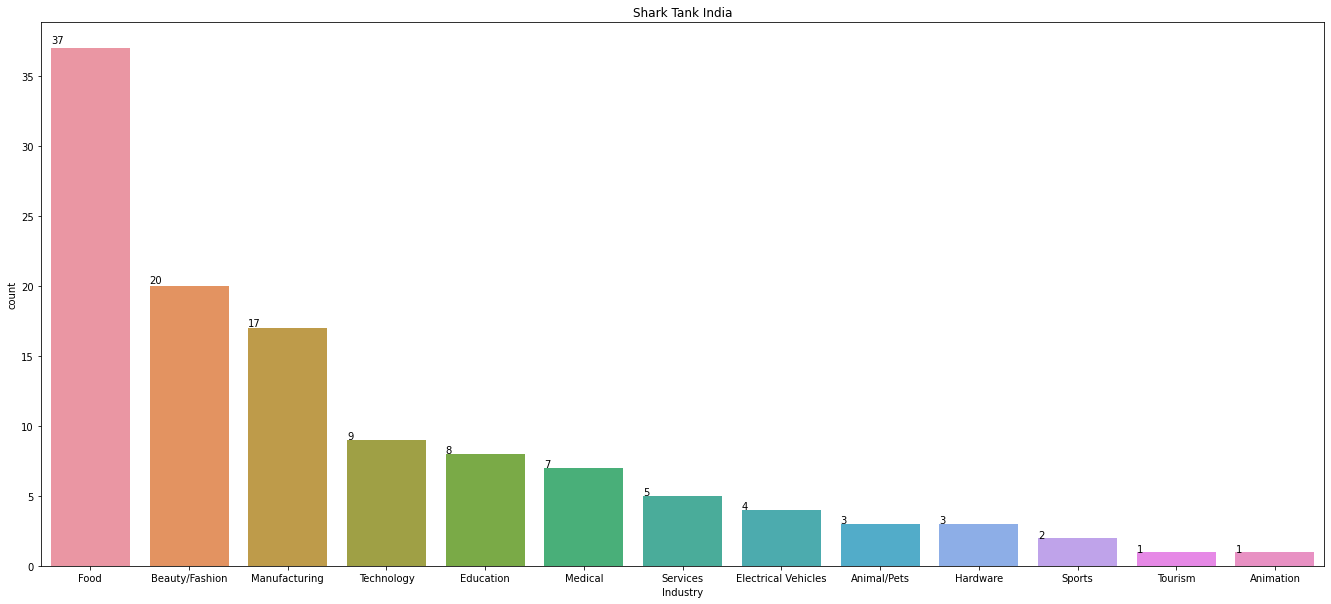

In [12]:
# Types of industries, came for pitching
print(shark_tank['Industry'].value_counts(), "\n")

fig = plt.figure(figsize=(23, 10))
ax = sns.countplot(x='Industry', data=shark_tank, order=shark_tank['Industry'].value_counts().index)
ax.set_title('Shark Tank India')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [13]:
# Gender wise
print("Total pitchers -", int(shark_tank['Number of Presenters'].sum()), "\n")

print("Total male pitchers -", int(shark_tank['Male Presenter'].sum()), "\n")

print("Total female pitchers -", int(shark_tank['Female Presenter'].sum()), "\n")

print("Male entrepreneurs percentage - ", round(shark_tank['Male Presenter'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')
print("Female entrepreneurs percentage - ", round(shark_tank['Female Presenter'].sum()/shark_tank['Number of Presenters'].sum()*100, 2), "%\n", sep='')


Total pitchers - 242 

Total male pitchers - 169 

Total female pitchers - 74 

Male entrepreneurs percentage - 69.83%

Female entrepreneurs percentage - 30.58%



#### 72% companies received offers and 28% startups could not convince Sharks to invest

1    84
0    33
Name: Received Offer, dtype: int64 

1    72%
0    28%
Name: Received Offer, dtype: object 



<AxesSubplot:xlabel='Received Offer', ylabel='count'>

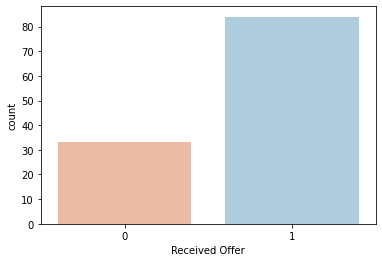

In [14]:
# Offers received
print(shark_tank['Received Offer'].value_counts(), "\n")
print(round(shark_tank['Received Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
sns.countplot(x='Received Offer', data=shark_tank, palette='RdBu')

#### 77% companies accepted offers and 23% startups didn't accept Sharks offer

1.0    65
0.0    19
Name: Accepted Offer, dtype: int64 

1.0    77.0
0.0    23.0
Name: Accepted Offer, dtype: float64 



<AxesSubplot:xlabel='Accepted Offer', ylabel='count'>

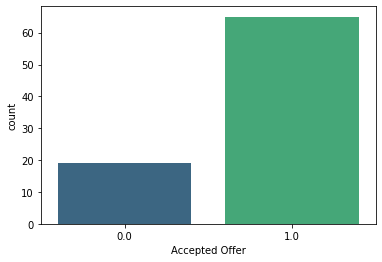

In [15]:
# Offers accepted
print(shark_tank['Accepted Offer'].value_counts(), "\n")
#print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'), "\n")
print(round(shark_tank['Accepted Offer'].value_counts(normalize=True)*100), "\n")
sns.countplot(x='Accepted Offer', data=shark_tank, palette="viridis")

In [16]:
# Offers rejected by pitchers
shark_tank.loc[shark_tank['Accepted Offer']==0, ["Startup Name","Original Ask Amount","Original Ask Equity"]]

,Startup Name,Original Ask Amount,Original Ask Equity
6,qZense Labs,100.0,0.25
19,Torch-it,75.0,1.00
20,La Kheer Deli,50.0,7.50
26,Kabira Handmad,100.0,5.00
40,Morriko Pure Foods,100.0,3.00
54,India Hemp and Co,50.0,4.00
59,Keto India,150.0,1.25
69,Moonshine,80.0,0.50
70,Falhari,50.0,2.00
72,Urban Monkey,100.0,1.00


In [17]:
# Sum of investment amount asked by all startup companies, in Shark Tank, in India
print(format_currency(shark_tank['Original Ask Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹374.53 crores


In [18]:
# Sum of amount investmented by all sharks, in Shark Tank, in India
print(format_currency(shark_tank['Total Deal Amount'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹38.32 crores


In [19]:
# Sum of loan/debt amount given by all sharks, in Shark Tank, in India
print(format_currency(shark_tank['Total Deal Debt'].sum()/100, 'INR', locale='en_IN').replace(".00", ""), "crores")

₹3.01 crores


In [20]:
# Top 15 investments, as per total investment/deal amount
shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15)

Startup Name
Aas Vidyalaya          150.0
Annie                  105.0
Get-A-Whey             100.0
Hammer Lifestyle       100.0
Humpy A2               100.0
IN A CAN               100.0
Insurance Samadhan     100.0
Proxgy                 100.0
Raising Superstars     100.0
Revamp Moto            100.0
Skippi Ice Pops        100.0
Sunfox Technologies    100.0
The Renal Project      100.0
The Yarn Bazaar        100.0
Kabaddi Adda            80.0
Name: Total Deal Amount, dtype: float64

In [21]:
# Top 10 investments, as per total equity/shares percentage
shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(10)

Startup Name
Sid07 Designs                     75.00
Booz Scooters                     50.00
Isak Fragrances                   50.00
Hammer Lifestyle                  40.00
KG Agrotech                       40.00
The Sass Bar                      35.00
Vivalyf Innovations               33.33
Gold Safe Solutions Industries    30.00
Heart up my Sleeves               30.00
Jain Shikanji                     30.00
Name: Total Deal Equity, dtype: float64

In [22]:
# Top 5 investments, as per total debt/loan amount
shark_tank.groupby('Startup Name')['Total Deal Debt'].max().nlargest(5)

Startup Name
Otua            99.0
Namhya Foods    50.0
Bamboo India    30.0
NOCD            30.0
PNT             25.0
Name: Total Deal Debt, dtype: float64

## Which shark invested most ?

In [23]:
# Maximum - as per Investment Amount
print("Aman invested -", max(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Aman invested - 8.87490016 crores


In [24]:
# Minimum - as per Investment Amount
print("Ghazal invested -", min(shark_tank['Ashneer Investment Amount'].sum()/100, shark_tank['Namita Investment Amount'].sum()/100, shark_tank['Anupam Investment Amount'].sum()/100, shark_tank['Vineeta Investment Amount'].sum()/100,
    shark_tank['Aman Investment Amount'].sum()/100, shark_tank['Peyush Investment Amount'].sum()/100, shark_tank['Ghazal Investment Amount'].sum()/100), "crores")

Ghazal invested - 1.299902525 crores


In [25]:
# Maximum - as per Equity - who received maximum shares
print("Peyush got equity of -", max(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Peyush got equity of - 315.84000000000003 % in different companies


In [26]:
# Minimum - as per Equity - who received least amount of shares
print("Ghazal got equity of -", min(shark_tank['Ashneer Investment Equity'].sum(), shark_tank['Namita Investment Equity'].sum(), shark_tank['Anupam Investment Equity'].sum(), shark_tank['Vineeta Investment Equity'].sum(),
    shark_tank['Aman Investment Equity'].sum(), shark_tank['Peyush Investment Equity'].sum(), shark_tank['Ghazal Investment Equity'].sum()), "% in different companies")

Ghazal got equity of - 46.7 % in different companies


In [27]:
# Maximum - as per Debt/loaned Amount
print("Ashneer gave loan of -", max(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Ashneer gave loan of - 1.14 crores


In [28]:
# Minimum - as per Debt/loaned Amount - Ghazal & Namita has not given any loan
print("Namita/Ghazal gave loan of -", min(shark_tank['Ashneer Debt Amount'].sum()/100, shark_tank['Namita Debt Amount'].sum()/100, shark_tank['Anupam Debt Amount'].sum()/100, shark_tank['Vineeta Debt Amount'].sum()/100,
    shark_tank['Aman Debt Amount'].sum()/100, shark_tank['Peyush Debt Amount'].sum()/100, shark_tank['Ghazal Debt Amount'].sum()/100), "crores")

Namita/Ghazal gave loan of - 0.0 crores


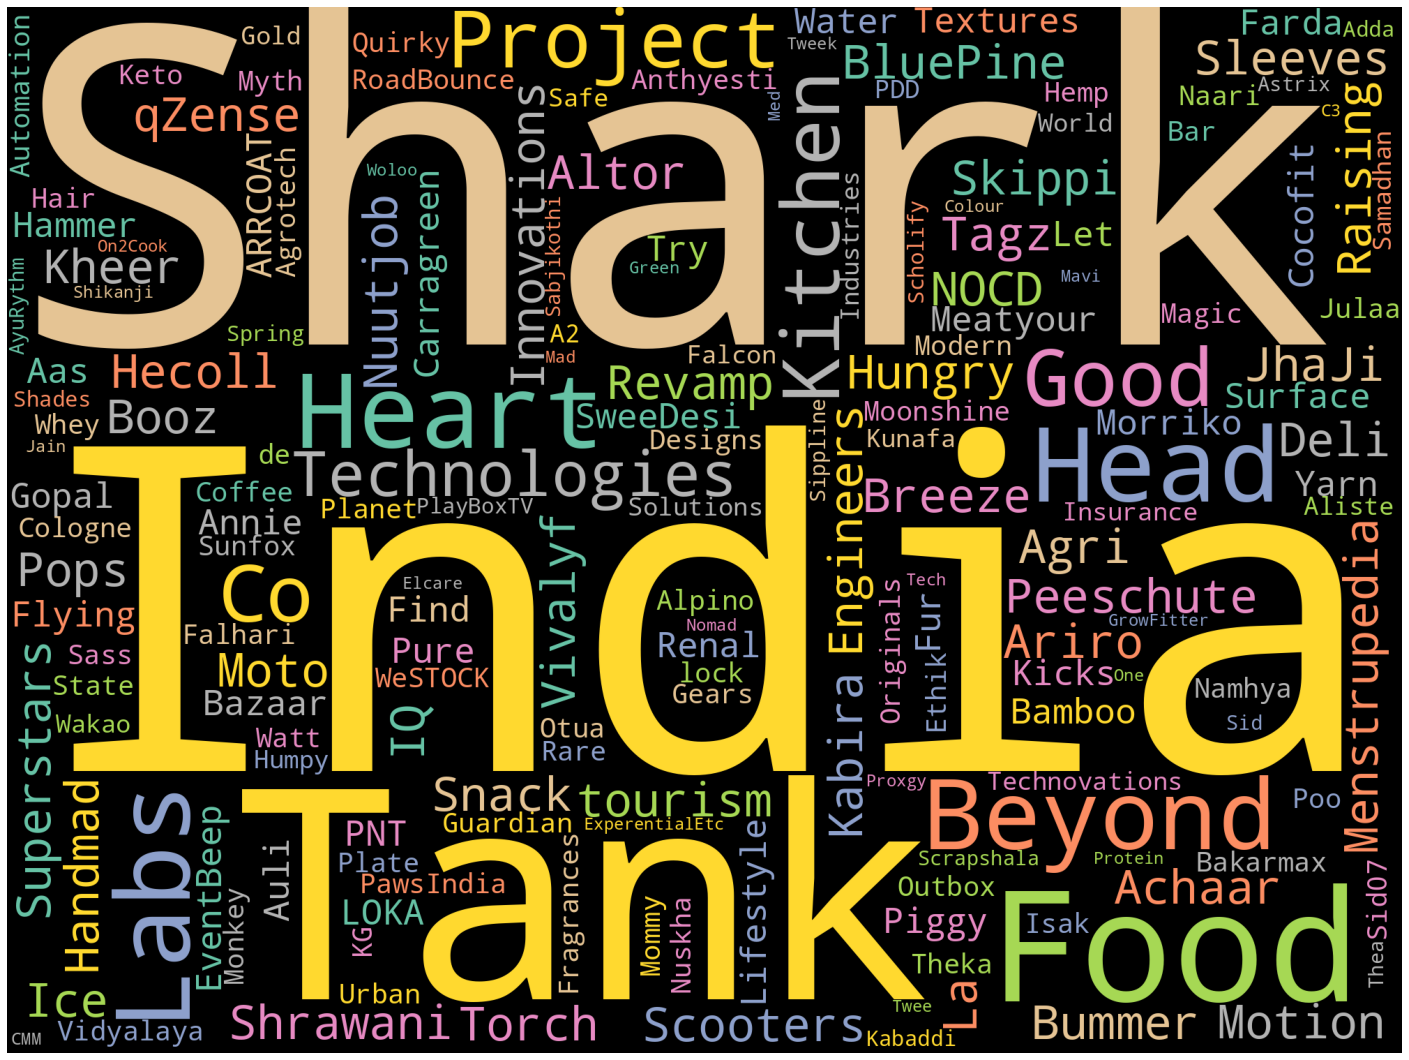

In [29]:
# Word cloud based on Startup Name
text = " Shark Tank India ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width = 2000, height = 1500, background_color='black', colormap='Set2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Ashneer Grover's Investments

In [30]:
# Ashneer
print("Investment amount by Ashneer", round(shark_tank['Ashneer Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ashneer", round(shark_tank['Ashneer Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ashneer", round(shark_tank['Ashneer Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Ashneer Investment Amount']>0][["Startup Name","Industry","Ashneer Investment Amount"]])

print("\nAshneer industry wise investments\n")
print(shark_tank[shark_tank['Ashneer Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Ashneer 5.39 crores
Equity received by Ashneer 93.24 % in different companies
Debt/loan amount by Ashneer 1.14 crores

              Startup Name             Industry  Ashneer Investment Amount
0           BluePine Foods                 Food                      25.00
1            Booz Scooters  Electrical Vehicles                      20.00
3               Tagz Foods                 Food                      70.00
15         Skippi Ice Pops                 Food                      20.00
18      Raising Superstars            Education                      50.00
21            Beyond Snack                 Food                      25.00
23           Motion Breeze  Electrical Vehicles                      30.00
29               EventBeep            Education                      10.00
38         The Yarn Bazaar        Manufacturing                      25.00
45            Bamboo India        Manufacturing                      25.00
49   Find Your Kicks India       Be

# Namita Thapar's Investments

In [31]:
# Namita
print("Investment amount by Namita", round(shark_tank['Namita Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Namita", round(shark_tank['Namita Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Namita", round(shark_tank['Namita Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Namita Investment Amount']>0][["Startup Name","Industry","Namita Investment Amount"]])

print("\n Namita industry wise investments\n")
print(shark_tank[shark_tank['Namita Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Namita 6.48 crores
Equity received by Namita 134.78 % in different companies
Debt/loan amount by Namita 0.0 crores

              Startup Name        Industry  Namita Investment Amount
11                  Bummer  Beauty/Fashion                 37.500000
15         Skippi Ice Pops            Food                 20.000000
16            Menstrupedia       Education                 50.000000
24                   Altor   Manufacturing                 25.000000
27                 Nuutjob  Beauty/Fashion                  8.330000
32                   Farda  Beauty/Fashion                 15.000000
33                    Auli  Beauty/Fashion                 75.000000
36                   Annie       Education                 35.000000
39       The Renal Project         Medical                 50.000000
44                 Cocofit            Food                  0.000016
47            Beyond Water            Food                 37.500000
49   Find Your Kicks India  Beauty/

# Anupam Mittal's Investments

In [32]:
# Anupam
print("Investment amount by Anupam", round(shark_tank['Anupam Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Anupam", round(shark_tank['Anupam Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Anupam", round(shark_tank['Anupam Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Anupam Investment Amount']>0][["Startup Name","Industry","Anupam Investment Amount"]])

print("\n Anupam industry wise investments\n")
print(shark_tank[shark_tank['Anupam Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Anupam 5.34 crores
Equity received by Anupam 166.35 % in different companies
Debt/loan amount by Anupam 0.15 crores

                 Startup Name             Industry  Anupam Investment Amount
2         Heart up my Sleeves       Beauty/Fashion                 12.500000
9                      Cos IQ       Beauty/Fashion                 25.000000
12                Revamp Moto  Electrical Vehicles                 50.000000
15            Skippi Ice Pops                 Food                 20.000000
22        Vivalyf Innovations              Medical                 28.000000
28                   Meatyour                 Food                 10.000000
31   ARRCOAT Surface Textures        Manufacturing                 50.000000
35                       LOKA           Technology                 13.330000
36                      Annie            Education                 35.000000
37                 Carragreen        Manufacturing                 25.000000
38            T

# Vineeta Singh's Investments

In [33]:
# Vineeta
print("Investment amount by Vineeta", round(shark_tank['Vineeta Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Vineeta", round(shark_tank['Vineeta Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Vineeta", round(shark_tank['Vineeta Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Vineeta Investment Amount']>0][["Startup Name","Industry","Vineeta Investment Amount"]])

print("\n Vineeta industry wise investments\n")
print(shark_tank[shark_tank['Vineeta Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Vineeta 3.28 crores
Equity received by Vineeta 131.53 % in different companies
Debt/loan amount by Vineeta 0.3 crores

                       Startup Name             Industry  \
0                    BluePine Foods                 Food   
1                     Booz Scooters  Electrical Vehicles   
2               Heart up my Sleeves       Beauty/Fashion   
8                              NOCD                 Food   
9                            Cos IQ       Beauty/Fashion   
15                  Skippi Ice Pops                 Food   
64                       Get-A-Whey                 Food   
66                 The Quirky Naari       Beauty/Fashion   
79              Sunfox Technologies              Medical   
88                         Humpy A2                 Food   
90   Gold Safe Solutions Industries        Manufacturing   
91                      Wakao Foods                 Food   
95                     Kabaddi Adda               Sports   
110              Nom

# Aman Gupta's Investments

In [34]:
# Aman
print("Investment amount by Aman", round(shark_tank['Aman Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Aman", round(shark_tank['Aman Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Aman", round(shark_tank['Aman Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Aman Investment Amount']>0][["Startup Name","Industry","Aman Investment Amount"]])

print("\n Aman industry wise investments\n")
print(shark_tank[shark_tank['Aman Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Aman 8.87 crores
Equity received by Aman 160.25 % in different companies
Debt/loan amount by Aman 0.5 crores

              Startup Name             Industry  Aman Investment Amount
0           BluePine Foods                 Food               25.000000
7                Peeschute       Beauty/Fashion               75.000000
11                  Bummer       Beauty/Fashion               37.500000
12             Revamp Moto  Electrical Vehicles               50.000000
15         Skippi Ice Pops                 Food               20.000000
18      Raising Superstars            Education               50.000000
21            Beyond Snack                 Food               25.000000
24                   Altor        Manufacturing               25.000000
25                   Ariro        Manufacturing               25.000000
27                 Nuutjob       Beauty/Fashion                8.330000
28                Meatyour                 Food               10.000000
29   

# Peyush Bansal's Investments

In [35]:
# Peyush
print("Investment amount by Peyush", round(shark_tank['Peyush Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Peyush", round(shark_tank['Peyush Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Peyush", round(shark_tank['Peyush Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Peyush Investment Amount']>0][["Startup Name","Industry","Peyush Investment Amount"]])

print("\n Peyush industry wise investments\n")
print(shark_tank[shark_tank['Peyush Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Peyush 7.65 crores
Equity received by Peyush 315.84 % in different companies
Debt/loan amount by Peyush 0.92 crores

                       Startup Name        Industry  Peyush Investment Amount
22              Vivalyf Innovations         Medical                 28.000000
25                            Ariro   Manufacturing                 25.000000
27                          Nuutjob  Beauty/Fashion                  8.330000
28                         Meatyour            Food                 10.000000
29                        EventBeep       Education                 10.000000
35                             LOKA      Technology                 13.330000
36                            Annie       Education                 35.000000
37                       Carragreen   Manufacturing                 25.000000
38                  The Yarn Bazaar   Manufacturing                 25.000000
43                              PNT      Technology                 25.000000
49  

# Ghazal Alagh's Investments

In [36]:
# Ghazal
print("Investment amount by Ghazal", round(shark_tank['Ghazal Investment Amount'].sum()/100, 2), "crores")
print("Equity received by Ghazal", round(shark_tank['Ghazal Investment Equity'].sum(), 2), "% in different companies")
print("Debt/loan amount by Ghazal", round(shark_tank['Ghazal Debt Amount'].sum()/100, 2), "crores\n")

print(shark_tank.loc[shark_tank['Ghazal Investment Amount']>0][["Startup Name","Industry","Ghazal Investment Amount"]])

print("\n Ghazal industry wise investments\n")
print(shark_tank[shark_tank['Ghazal Investment Amount']>0].groupby('Industry')['Industry'].value_counts().sort_values(ascending=False))

Investment amount by Ghazal 1.3 crores
Equity received by Ghazal 46.7 % in different companies
Debt/loan amount by Ghazal 0.0 crores

                       Startup Name        Industry  Ghazal Investment Amount
75                     The Sass Bar  Beauty/Fashion                 25.000000
79              Sunfox Technologies         Medical                 20.000000
85               Watt Technovations         Medical                  0.000253
88                         Humpy A2            Food                 33.330000
90   Gold Safe Solutions Industries   Manufacturing                 16.660000
91                      Wakao Foods            Food                 25.000000
110              Nomad Food Project            Food                 10.000000

 Ghazal industry wise investments

Industry        Industry      
Food            Food              3
Medical         Medical           2
Beauty/Fashion  Beauty/Fashion    1
Manufacturing   Manufacturing     1
Name: Industry, dtype: int64


1.0    22
2.0    20
3.0    14
4.0     5
5.0     4
Name: Number of sharks in deal, dtype: int64 

1.0    34.0
2.0    31.0
3.0    22.0
4.0     8.0
5.0     6.0
Name: Number of sharks in deal, dtype: float64


<AxesSubplot:xlabel='Number of sharks in deal', ylabel='count'>

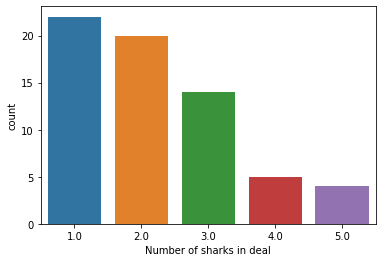

In [37]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
#print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%'))
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100))

sns.countplot(data = shark_tank, x = 'Number of sharks in deal')

In [38]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Startup Name","Total Deal Amount","Total Deal Equity"]])

             Startup Name  Total Deal Amount  Total Deal Equity
15        Skippi Ice Pops              100.0               15.0
49  Find Your Kicks India               50.0               25.0
63               IN A CAN              100.0               10.0
79    Sunfox Technologies              100.0                6.0


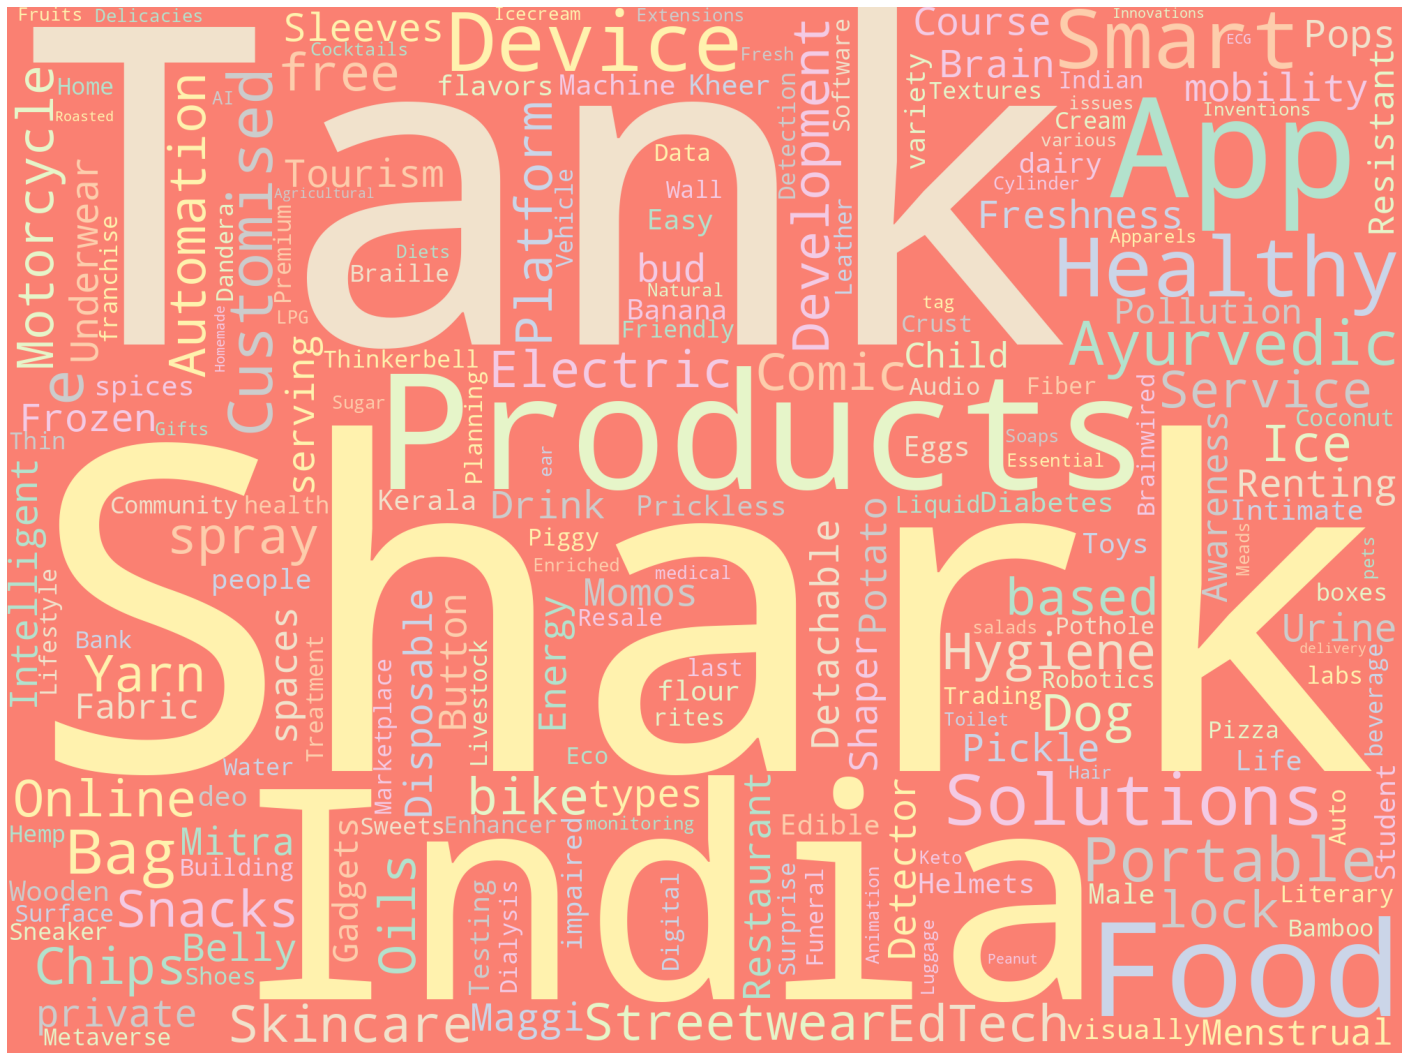

In [39]:
# Word cloud based on Business Description
text = " Shark Tank India ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width = 2000, height = 1500, background_color='salmon', colormap='Pastel2', collocations=False, random_state=2022).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Data set values verification

In [40]:
shark_tank.loc[shark_tank['Number of Presenters'] != shark_tank['Male Presenter'].fillna(0) + shark_tank['Female Presenter'].fillna(0)]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
112,1,34,Scaling Ambitions,113,Green Protein,Food,Plant-Based Protein,1,1.0,1.0,2019.0,Mumbai,NaN,1200000.0,40.0,60.0,2.0,3000,1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
shark_tank.loc[shark_tank['Total Deal Amount'].fillna(0) != (shark_tank['Ashneer Investment Amount'].fillna(0) + shark_tank['Namita Investment Amount'].fillna(0) + shark_tank['Anupam Investment Amount'].fillna(0) + shark_tank['Vineeta Investment Amount'].fillna(0) 
                                                   + shark_tank['Aman Investment Amount'].fillna(0) + shark_tank['Peyush Investment Amount'].fillna(0) + shark_tank['Ghazal Investment Amount'].fillna(0))]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
27,1,10,Passion About Entrepreneurship,28,Nuutjob,Beauty/Fashion,Male Intimate Hygiene deo spray,2,NaN,2.0,NaN,NaN,NaN,200.0,70.0,25.00000,5.0,500,1,1.0,25.00000,20.0,NaN,125.0,0.00,0.0,NaN,8.330000,6.660,NaN,0.000000,0.000,NaN,NaN,NaN,NaN,8.330000,6.660,NaN,8.33,6.66,NaN,NaN,NaN,NaN,3.0
35,1,12,Ek Idea Aur Uske Do Sides,36,LOKA,Technology,Metaverse App,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00000,5.0,800,1,1.0,40.00000,24.0,NaN,167.0,0.00,0.0,NaN,0.000000,0.000,NaN,13.330000,8.000,NaN,NaN,NaN,NaN,13.330000,8.000,NaN,13.33,8.00,NaN,NaN,NaN,NaN,3.0
44,1,15,It's Time To Change,45,Cocofit,Food,Coconut based beverage franchise,3,3.0,NaN,NaN,Hyderabad,NaN,NaN,95.0,0.00005,5.0,0,1,1.0,0.00005,5.0,NaN,0.0,0.00,0.0,NaN,0.000016,1.666,NaN,0.000016,1.666,NaN,NaN,NaN,NaN,0.000016,1.666,NaN,0.00,0.00,NaN,NaN,NaN,NaN,3.0
64,1,21,Game-changing Ideas,65,Get-A-Whey,Food,Sugar-Free Icecream,2,1.0,1.0,NaN,NaN,NaN,3000000.0,69.0,100.00000,8.0,1250,1,1.0,100.00000,15.0,NaN,667.0,33.33,5.0,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,33.33,5.0,NaN,33.330000,5.000,NaN,0.00,0.00,NaN,NaN,NaN,NaN,3.0
88,1,28,Meeting The New India Minds,89,Humpy A2,Food,Organic Milk A2 Products,3,2.0,1.0,2017.0,Pune,208.0,NaN,44.0,75.00000,4.0,1875,1,1.0,100.00000,15.0,NaN,667.0,NaN,NaN,NaN,0.000000,0.000,NaN,0.000000,0.000,NaN,33.33,5.0,NaN,NaN,NaN,NaN,33.33,5.00,NaN,33.33,5.0,NaN,3.0
90,1,28,Meeting The New India Minds,91,Gold Safe Solutions Industries,Manufacturing,Anti-Suicidal Fan Rod,2,2.0,NaN,2017.0,Mumbai,50.0,NaN,25.0,50.00000,5.0,1000,1,1.0,50.00000,30.0,NaN,167.0,NaN,NaN,NaN,0.000000,0.000,NaN,0.000000,0.000,NaN,16.66,10.0,NaN,NaN,NaN,NaN,16.66,10.00,NaN,16.66,10.0,NaN,3.0


In [42]:
shark_tank.loc[shark_tank['Total Deal Equity'].fillna(0) != (shark_tank['Ashneer Investment Equity'].fillna(0) + shark_tank['Namita Investment Equity'].fillna(0) + shark_tank['Anupam Investment Equity'].fillna(0) + shark_tank['Vineeta Investment Equity'].fillna(0) 
                                                   + shark_tank['Aman Investment Equity'].fillna(0) + shark_tank['Peyush Investment Equity'].fillna(0) + shark_tank['Ghazal Investment Equity'].fillna(0))]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal
0,1,1,Badlegi Business Ki Tasveer,1,BluePine Foods,Food,Frozen Momos,3,2.0,1.0,NaN,NaN,95.0,800000.0,NaN,50.00000,5.0,1000,1,1.0,75.00000,16.00,NaN,469.0,25.0,5.33,NaN,0.000000,0.000,NaN,0.000000,0.000,NaN,25.0,5.33,NaN,25.000000,5.330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
22,1,8,Shark Ko Impress Karne Wale Ideas,23,Vivalyf Innovations,Medical,Easy Life Prickless Diabetes Testing Machine,2,1.0,1.0,NaN,Hyderabad,NaN,NaN,NaN,56.00000,7.5,747,1,1.0,56.00000,33.33,NaN,168.0,0.0,0.00,NaN,0.000000,0.000,NaN,28.000000,16.660,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,28.00,16.66,NaN,NaN,NaN,NaN,2.0
27,1,10,Passion About Entrepreneurship,28,Nuutjob,Beauty/Fashion,Male Intimate Hygiene deo spray,2,NaN,2.0,NaN,NaN,NaN,200.0,70.0,25.00000,5.0,500,1,1.0,25.00000,20.00,NaN,125.0,0.0,0.00,NaN,8.330000,6.660,NaN,0.000000,0.000,NaN,NaN,NaN,NaN,8.330000,6.660,NaN,8.33,6.66,NaN,NaN,NaN,NaN,3.0
28,1,10,Passion About Entrepreneurship,29,Meatyour,Food,Eggs,3,3.0,NaN,NaN,NaN,130.0,280000.0,30.0,30.00000,5.0,600,1,1.0,30.00000,20.00,NaN,150.0,0.0,0.00,NaN,0.000000,0.000,NaN,10.000000,6.660,NaN,NaN,NaN,NaN,10.000000,6.660,NaN,10.00,6.66,NaN,NaN,NaN,NaN,3.0
44,1,15,It's Time To Change,45,Cocofit,Food,Coconut based beverage franchise,3,3.0,NaN,NaN,Hyderabad,NaN,NaN,95.0,0.00005,5.0,0,1,1.0,0.00005,5.00,NaN,0.0,0.0,0.00,NaN,0.000016,1.666,NaN,0.000016,1.666,NaN,NaN,NaN,NaN,0.000016,1.666,NaN,0.00,0.00,NaN,NaN,NaN,NaN,3.0
67,1,22,Turning Ideas Into Businesses,68,Hair Originals,Beauty/Fashion,Natural Hair Extensions,3,3.0,NaN,2019.0,NaN,NaN,5000000.0,62.0,60.00000,2.0,3000,1,1.0,60.00000,4.00,NaN,1500.0,20.0,1.33,NaN,NaN,NaN,NaN,20.000000,1.330,NaN,0.0,0.00,NaN,0.000000,0.000,NaN,20.00,1.33,NaN,NaN,NaN,NaN,3.0
108,1,33,Life-Changing Ideas,109,Tweek Labs,Sports,Sportswear,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,40.00000,2.0,2000,1,1.0,60.00000,10.00,NaN,600.0,20.0,3.33,NaN,0.000000,0.000,NaN,20.000000,3.330,NaN,NaN,NaN,NaN,0.000000,0.000,NaN,20.00,3.33,NaN,NaN,NaN,NaN,3.0


In [43]:
shark_tank.loc[shark_tank['Total Deal Debt'].fillna(0) != (shark_tank['Ashneer Debt Amount'].fillna(0) + shark_tank['Namita Debt Amount'].fillna(0) + shark_tank['Anupam Debt Amount'].fillna(0) + shark_tank['Vineeta Debt Amount'].fillna(0) 
                                                   + shark_tank['Aman Debt Amount'].fillna(0) + shark_tank['Peyush Debt Amount'].fillna(0) + shark_tank['Ghazal Debt Amount'].fillna(0))]

,Season Number,Episode Number,Episode Title,Pitch Number,Startup Name,Industry,Business Description,Number of Presenters,Male Presenter,Female Presenter,Started in,Pitchers Home City,Yearly Revenue,Monthly Sales,Gross Margin,Original Ask Amount,Original Ask Equity,Valuation Requested,Received Offer,Accepted Offer,Total Deal Amount,Total Deal Equity,Total Deal Debt,Valuation Offered,Ashneer Investment Amount,Ashneer Investment Equity,Ashneer Debt Amount,Namita Investment Amount,Namita Investment Equity,Namita Debt Amount,Anupam Investment Amount,Anupam Investment Equity,Anupam Debt Amount,Vineeta Investment Amount,Vineeta Investment Equity,Vineeta Debt Amount,Aman Investment Amount,Aman Investment Equity,Aman Debt Amount,Peyush Investment Amount,Peyush Investment Equity,Peyush Debt Amount,Ghazal Investment Amount,Ghazal Investment Equity,Ghazal Debt Amount,Number of sharks in deal


In [44]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))

import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))


# numpy version: 1.20.3
# pandas version: 1.3.5
# matplotlib version: 3.5.1
# seaborn version: 0.11.2

numpy version: 1.20.3
pandas version: 1.3.5
matplotlib version: 3.5.1
seaborn version: 0.11.2
